In [2]:
import pde
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings('ignore')

# FPE for the inter-sister distance when $\sigma = \{(+,-),(-,+)\}$

$$\frac{\partial P_\sigma}{\partial t} = -\frac{\partial}{\partial \Delta x}f_\sigma(\Delta x)P_\sigma + \frac{s^2}{2}\frac{\partial^2 }{\partial(\Delta x)^2}P_\sigma$$

$$f_\sigma(\Delta x) = 0.06 - 0.13\Delta x$$

The FPE is solved numerically using py-pde python package to generate data

In [41]:
grid = pde.CartesianGrid([[0,0.8]], 100)  # generate grid for x axis
field = pde.ScalarField(grid,)

#initial condition using delta function
field.insert([0.5], 1)

# No flux bc
bc_lower = {"value": 0}
bc_upper = {"derivative": 0}
bc = [bc_lower, bc_upper]

# pde definition    
eq = pde.PDE({"p": "-d_dx(p * (0.06 - 0.13*x)) + (0.001 * laplace(p))"}, bc=bc)#(0.14-(0.13*x))

# data collection
storage = pde.MemoryStorage()
trackers = [
    "progress",  # show progress bar during simulation
    "steady_state",  # abort when steady state is reached
    storage.tracker(interval=0.0001),  # store data every simulation time unit
    pde.PlotTracker(show=True),  # show images during simulation
    # print some output every 5 real seconds:
    pde.PrintTracker(interval=pde.RealtimeIntervals(duration=2)),
]

#solve the PDE
res = eq.solve(field, 65, dt=0.001, tracker=["progress", storage.tracker(0.1)])  #  ["progress", storage.tracker(0.0001)]


  0%|          | 0/65.0 [00:00<?, ?it/s]

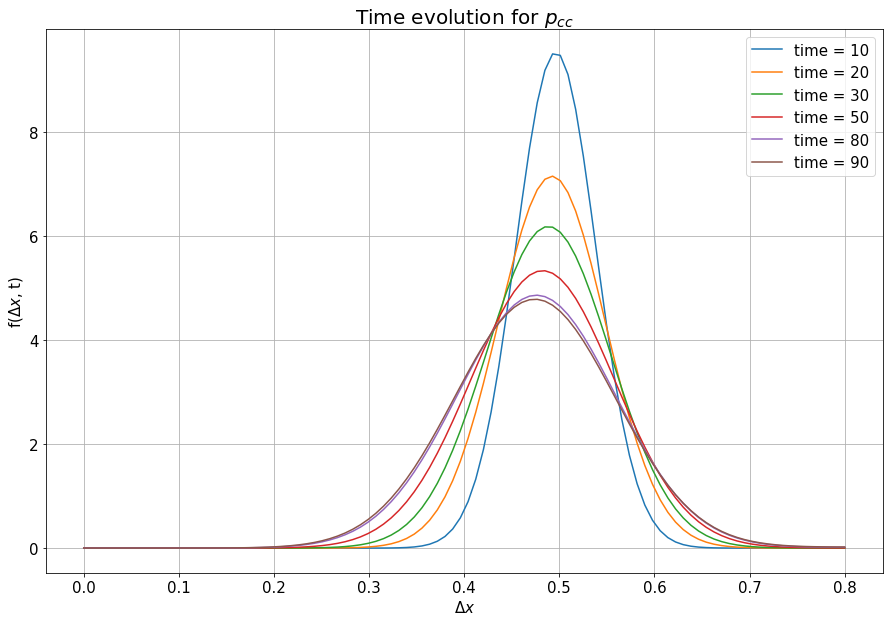

In [42]:
Pt = np.array(storage.data)

# Visualization
x = np.linspace(0.,.8,100)
time = [10,20,30,50,80,90] 
plt.figure(figsize=(15,10))

for t in time:
    plt.plot(x,Pt[t],label='time = {}'.format(t))
plt.grid('on')    
#plt.plot(x,res.data,label='time = {}'.format(len(storage.data)))
plt.legend(fontsize=15)
plt.title('Time evolution for $p_{cc}$', fontsize=20)
plt.xlabel('$\Delta x$', fontsize=15);plt.ylabel('f($\Delta x$, t)', fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)
#plt.savefig('../Plots/fpep--.png')
plt.show()

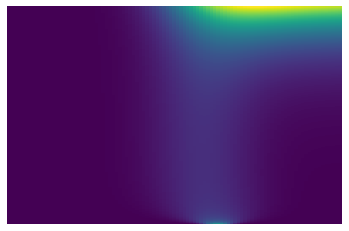

In [10]:
Pt = np.array(storage.data)



t = np.arange(0,65,0.1)
x = np.linspace(0.,0.8,100)

xx, yy = np.meshgrid(x,t)

plt.pcolor(xx,yy,Pt[1:,:])
plt.axis('off')
plt.show()

In [10]:
# Save data for equation learning

np.save('../Data/inter_sister_distance_FPE_cc.npy',Pt)